In [23]:
from rdkit import Chem
import rdkit.Chem.rdPartialCharges
from IPython.display import SVG
import plotdot
import numpy as np



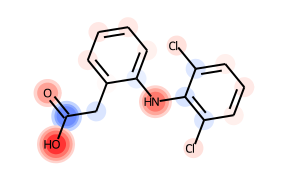

In [28]:

diclofenac = mol = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')

rdkit.Chem.rdPartialCharges.ComputeGasteigerCharges(mol)

# shade by partial charge (scaled to be in [-1, 1])
shading = np.array([a.GetDoubleProp("_GasteigerCharge")  for a in mol.GetAtoms()])
shading = shading / abs(shading).max()


SVG(plotdot.RKDMol2ShadedSVG(mol, shading))
